# TAHLR Week 10: Unsupervised Methods: Topic Modeling and Clustering

Code notebook for TAHLR course at ISAW (Fall 2023) based on Albrecht et al. 2022 (Blueprints) Ch. 8: Unsupervised Methods: Topic Modeling and Clustering

In [ ]:
# # Get data from remote location

# !mkdir -p ../data/blueprints
# !curl -LJO https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/un-general-debates/un-general-debates-blueprint.csv.gz --output-dir ../data/blueprints

In [22]:
# Imports
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Load data

file = "Plin_Datasheet_2.csv"
NH = df = pd.read_csv(file)
df.sample(2)

,id,author,language,year,genre,sources,contents,text
36,37,Plin_Eld,Latin,76,prose,M. Varrone. actis triumphorum. Maecenate. Iacc...,LIBRO XXXVII CONTINENTUR\n\n1\t\norigo gemmaru...,Liber XXXVII\n\n \ni\t \n1\t\nUt nihil in...
16,17,Plin_Eld,Latin,76,prose,Cornelio Nepote. Catone censorio. M. Varrone. ...,LIBRO XVII CONTINENTUR\n\nsativarum arborum na...,Liber XVII\n\ni\t\n1\t\nNatura arborum terra m...


In [24]:
df['text'] = df['text'].str.replace("\t", " ")
df['token_text'] = df['text'].astype(str).apply(lambda row: nltk.word_tokenize(row))
df['sources'] = df['sources'].str.replace("\t", " ")
df['token_sources'] = df['sources'].astype(str).apply(lambda row: nltk.word_tokenize(row))
df.head(5)


,id,author,language,year,genre,sources,contents,text,token_text,token_sources
0,1,Plin_Eld,Latin,70,prose,NaN,NaN,LIBRO II CONTINENTUR\n\n1 \nAn finitus sit mun...,"[LIBRO, II, CONTINENTUR, 1, An, finitus, sit, ...",[nan]
1,2,Plin_Eld,Latin,71,prose,M. Varrone. Sulpicio Gallo. Tito Caesare Imper...,LIBRO II CONTINENTUR\n\n1\t\nAn finitus sit mu...,Liber II\n\n1\n 1\nMundum et hoc quodcumque n...,"[Liber, II, 1, 1, Mundum, et, hoc, quodcumque,...","[M., Varrone, ., Sulpicio, Gallo, ., Tito, Cae..."
2,3,Plin_Eld,Latin,72,prose,\nTurranio Gracile. Cornelio Nepote. T. Livio....,"LIBRO III CONTINENTUR\n\nsitus, gentes, maria,...",Liber III\n\ni \n1 \nHactenus de situ et mirac...,"[Liber, III, i, 1, Hactenus, de, situ, et, mir...","[Turranio, Gracile, ., Cornelio, Nepote, ., T...."
3,4,Plin_Eld,Latin,73,prose,Catone censorio. M. Varrone. M. Agrippa. Divo ...,"LIBRO IV CONTINENTUR\n\nsitus, gentes, maria, ...",Liber IV\n\ni \n1 \nTertius Europae sinus Acro...,"[Liber, IV, i, 1, Tertius, Europae, sinus, Acr...","[Catone, censorio, ., M., Varrone, ., M., Agri..."
4,5,Plin_Eld,Latin,74,prose,\nAgrippa. Suetonio Paulino. M. Varrone. Varro...,LIBRO V CONTINENTUR\n\n1\t\nMauretaniarum\n\n2...,Liber V\n\ni \n1 \nAfricam Graeci Libyam appel...,"[Liber, V, i, 1, Africam, Graeci, Libyam, appe...","[Agrippa, ., Suetonio, Paulino, ., M., Varrone..."


In [25]:
# Preprocess data; spec. split into paragraphs

import re
df["paragraphs"] = df["text"].map(lambda text: re.split('[.?!]\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

<Axes: xlabel='id'>

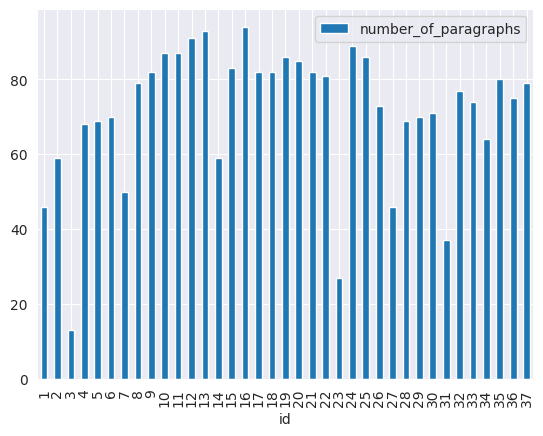

In [26]:
# Visualize paragraph count

NH.groupby('id').agg({'number_of_paragraphs': 'mean'}).plot.bar()

In [27]:
df.head(5)

,id,author,language,year,genre,sources,contents,text,token_text,token_sources,paragraphs,number_of_paragraphs
0,1,Plin_Eld,Latin,70,prose,NaN,NaN,LIBRO II CONTINENTUR\n\n1 \nAn finitus sit mun...,"[LIBRO, II, CONTINENTUR, 1, An, finitus, sit, ...",[nan],[LIBRO II CONTINENTUR\n\n1 \nAn finitus sit mu...,46
1,2,Plin_Eld,Latin,71,prose,M. Varrone. Sulpicio Gallo. Tito Caesare Imper...,LIBRO II CONTINENTUR\n\n1\t\nAn finitus sit mu...,Liber II\n\n1\n 1\nMundum et hoc quodcumque n...,"[Liber, II, 1, 1, Mundum, et, hoc, quodcumque,...","[M., Varrone, ., Sulpicio, Gallo, ., Tito, Cae...",[Liber II\n\n1\n 1\nMundum et hoc quodcumque ...,59
2,3,Plin_Eld,Latin,72,prose,\nTurranio Gracile. Cornelio Nepote. T. Livio....,"LIBRO III CONTINENTUR\n\nsitus, gentes, maria,...",Liber III\n\ni \n1 \nHactenus de situ et mirac...,"[Liber, III, i, 1, Hactenus, de, situ, et, mir...","[Turranio, Gracile, ., Cornelio, Nepote, ., T....",[Liber III\n\ni \n1 \nHactenus de situ et mira...,13
3,4,Plin_Eld,Latin,73,prose,Catone censorio. M. Varrone. M. Agrippa. Divo ...,"LIBRO IV CONTINENTUR\n\nsitus, gentes, maria, ...",Liber IV\n\ni \n1 \nTertius Europae sinus Acro...,"[Liber, IV, i, 1, Tertius, Europae, sinus, Acr...","[Catone, censorio, ., M., Varrone, ., M., Agri...",[Liber IV\n\ni \n1 \nTertius Europae sinus Acr...,68
4,5,Plin_Eld,Latin,74,prose,\nAgrippa. Suetonio Paulino. M. Varrone. Varro...,LIBRO V CONTINENTUR\n\n1\t\nMauretaniarum\n\n2...,Liber V\n\ni \n1 \nAfricam Graeci Libyam appel...,"[Liber, V, i, 1, Africam, Graeci, Libyam, appe...","[Agrippa, ., Suetonio, Paulino, ., M., Varrone...",[Liber V\n\ni \n1 \nAfricam Graeci Libyam appe...,69


In [35]:
# Make tf-idf matrix

from sklearn.feature_extraction.text import TfidfVectorizer

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
stopwords = [word for word in stopwords if word.isalpha()]

tfidf_text = TfidfVectorizer(stop_words=stopwords, min_df=3, max_df=0.30)
vectors_text = tfidf_text.fit_transform(NH['text'])
vectors_text.shape

(37, 6215)

In [36]:
# Flatten the paragraphs keeping the years

paragraph_df = pd.DataFrame([{ "token_text": paragraph, "token_sources": token_sources } 
                               for paragraphs, token_sources in \
                               zip(df["paragraphs"], df["token_sources"]) 
                                    for paragraph in paragraphs if paragraph])

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=3,
                                        max_df=0.5)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["token_text"])
tfidf_para_vectors.shape

(2645, 8452)

## Blueprint: Creating a Topic Model for Paragraphs Using NMF

In [37]:
# Decompose, NMF

from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_para_vectors)
H_text_matrix = nmf_text_model.components_

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [38]:
# Helper function for displaying topics

def display_topics(model, features, no_top_words=5):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]],
                  word_vector[largest[i]]*100.0/total))

In [39]:
# Display NMF topics

display_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  est (1.25)
  qui (0.94)
  ut (0.71)
  ex (0.60)
  eius (0.56)

Topic 01
  cum (2.73)
  ex (1.06)
  melle (0.99)
  vino (0.97)
  aceto (0.96)

Topic 02
  ab (1.72)
  oppidum (1.70)
  ad (1.36)
  oppida (1.07)
  flumen (0.84)

Topic 03
  alii (1.31)
  vocant (1.17)
  foliis (1.04)
  radice (0.99)
  folia (0.79)

Topic 04
  de (5.94)
  quibus (1.02)
  qui (0.66)
  causa (0.60)
  quis (0.55)

Topic 05
  non (1.85)
  nec (1.20)
  quam (0.85)
  ut (0.84)
  sed (0.80)

Topic 06
  summa (11.16)
  insulae (3.48)
  gentes (3.05)
  flumina (2.84)
  clara (2.77)

Topic 07
  contra (4.32)
  venena (1.14)
  vino (1.08)
  quoque (0.90)
  serpentium (0.86)

Topic 08
  si (3.45)
  aut (1.49)
  vel (0.79)
  quis (0.58)
  quod (0.57)

Topic 09
  quae (4.20)
  sunt (1.38)
  ex (0.64)
  iis (0.63)
  genera (0.61)


## Blueprint: Creating a Topic Model for Paragraphs with SVD

In [ ]:
# Decompose, SVD

from sklearn.decomposition import TruncatedSVD

svd_para_model = TruncatedSVD(n_components = 10, random_state=42)
W_svd_para_matrix = svd_para_model.fit_transform(tfidf_para_vectors)
H_svd_para_matrix = svd_para_model.components_

In [ ]:
# Display SVD topics

display_topics(svd_para_model, tfidf_para_vectorizer.get_feature_names_out())

## Blueprint: Creating a Topic Model for Paragraphs with LDA

In [ ]:
paragraph_df.shape

In [ ]:
# Reduce number of paragraphs (because LDA is computationally expensive)

paragraph_df = paragraph_df[:50000]

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5,
                                        max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape

In [ ]:
#  Work with count vectors

from sklearn.feature_extraction.text import CountVectorizer

count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5,
                        max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])

In [ ]:
# Decompose, lda_para_model; nb: could take a long time

from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [ ]:
display_topics(lda_para_model, tfidf_para_vectorizer.get_feature_names_out())

In [ ]:
# Use pyLDAvis to visualize topics

# !pip install pyLDAvis
import pyLDAvis.lda_model

lda_display = pyLDAvis.lda_model.prepare(lda_para_model, count_para_vectors,
                            count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

In [ ]:
# Visualize topic "weights" with word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100,
                       width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

In [ ]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## Bonus Blueprint: Kmeans clustering w. visualization

In [ ]:
# from https://medium.com/mlearning-ai/text-clustering-with-tf-idf-in-python-c94cd26a31e7

# Set up kmeans

X = tfidf_para_vectors

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [ ]:
# Reduce dimensions with PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
# Update dataframe

paragraph_df["cluster"] = clusters
paragraph_df["x0"] = x0
paragraph_df["x1"] = x1
paragraph_df.head()


In [ ]:
# Helper function, get top keywords

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tfidf_para_vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)

In [ ]:
# Map clusters to appropriate labels 

cluster_map = {0: "africa", 1: "general", 2: "china"}
paragraph_df['cluster'] = paragraph_df['cluster'].map(cluster_map)

In [ ]:
# Visualize clusters with Seaborn

import seaborn as sns

plt.figure(figsize=(12, 7))

plt.title("TF-IDF + KMeans on UN General Debates", fontdict={"fontsize": 18})

plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})

sns.scatterplot(data=paragraph_df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()